# 0. Import and function definition

In [4]:
!ls

__pycache__  README.md	windEnv.py  wind_notebook.ipynb


In [5]:
import numpy as np
import copy
from windEnv import *
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def vizualize_moves(states,ax=None):
    """
    show heatmap of the agent's movements
    inputs : states (type = list)
    """
    states = np.array(states)
    count_array = np.zeros(shape, dtype=np.int)
    for x in range(env.xlimit+1):
        for y in range(env.ylimit+1):
            y_idx_set = set(np.where(np.equal(states[:,0], x))[0])
            x_idx_set = set(np.where(np.equal(states[:,1], y))[0])
            count_array[y,x] = len(x_idx_set.intersection(y_idx_set))
    if type(ax) == None:
        sns.heatmap(count_array)
    else:
        return sns.heatmap((count_array),ax=ax)

In [7]:
def train_agent(agent,max_step,env,get_historic=False):
    """
    train the agent in the environment
    """
    if get_historic:
        states_historic = []
    step = 0
    while step<max_step and agent.state != env.goal:
        step+=1
        agent.fitstep(env)
        if get_historic:
            states_historic.append(copy.deepcopy(agent.state))
    if get_historic:
        return np.array(states_historic)

# 1. Problem definition

In [8]:
# create wind array
shape = (7,10)
wind = np.zeros(shape,dtype=int)
wind[:,[3,4,5,8]] = 1
wind[:,[6,7]] = 2

#goal location (y,x)
goal = [3,7]

#starting point (y,x)
start = [3,0]

#create env :
env = WindyEnv(wind, goal, start)

epsilon = 0.1
gamma = 0.9
alpha = 0.5
q=None

N_gen = 1000
max_step = 100

# 2. Learning Q

In [9]:
# train
q_list = []
historic=[]
for n in range(N_gen):
    agent = qlearning_agent(epsilon, env,gamma,alpha,q) # after the first iteration, q will be already created (!=None)
    if n in [0,25,50,150,200,250,300,500,1000]:
        historic.append(train_agent(agent,max_step, env,get_historic=True))
    else:
        train_agent(agent,max_step, env)
        
    q = copy.deepcopy(agent.q)
    q_list.append(q)
    #print(n,"gen.,\n", step,"step(s)")
    #agent.show(env)

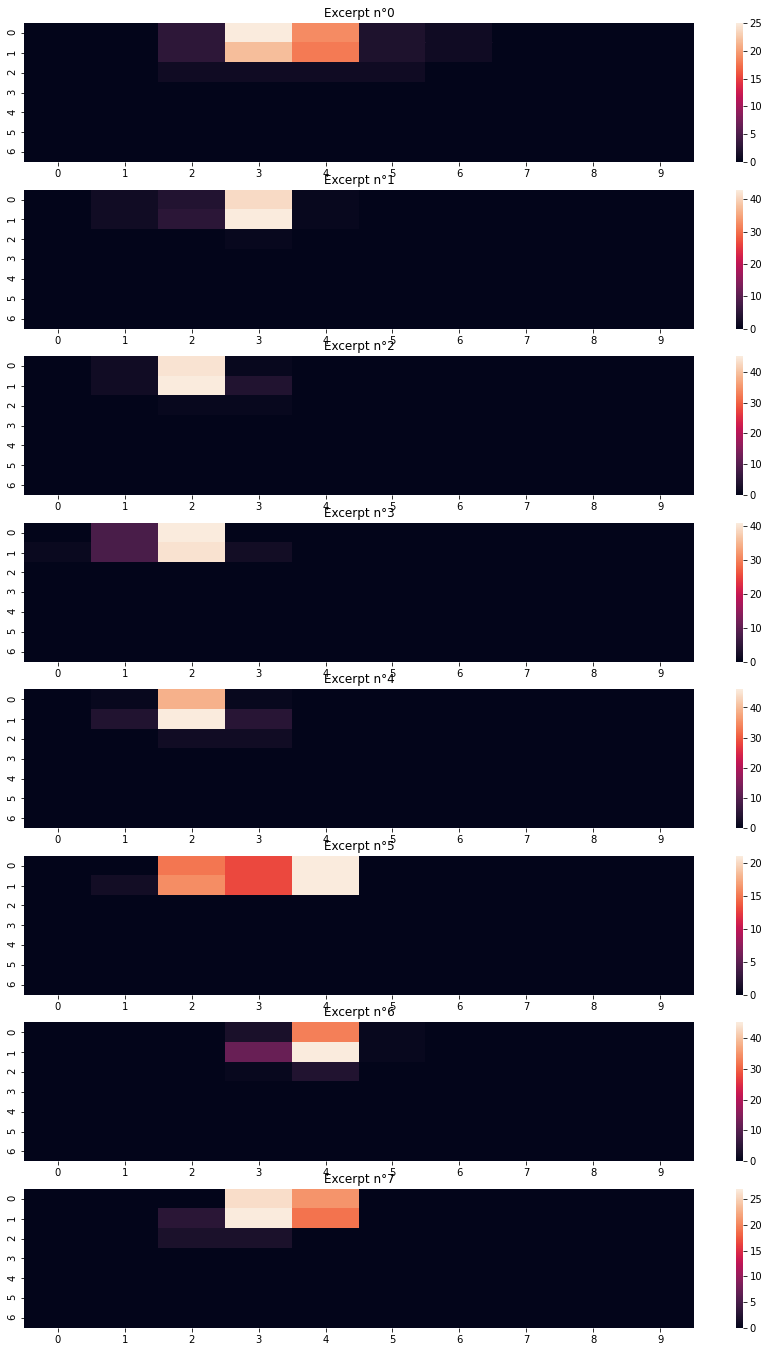

In [15]:
# Here we vizualize which location are visited by the chosen individuals

fig, axes = plt.subplots(len(historic),figsize=(15,15*len(historic)//5))

for i in range(len(historic)):
    axes[i] = vizualize_moves(historic[i],axes[i])
    axes[i].set_title("Excerpt n°" + str(i))

In [21]:
agent.state

[3, 0]

In [20]:
agent = qlearning_agent(epsilon, env,gamma,alpha,q) # after the first iteration, q will be already created (!=None)

In [25]:
for i in range(20):
    train_agent(agent,max_step, env)
    print(agent.state)

[2, 0]
[5, 1]
[4, 1]
[3, 1]
[5, 0]
[2, 0]
[3, 1]
[3, 0]
[4, 0]
[5, 1]
[3, 1]
[2, 0]
[3, 1]
[3, 1]
[2, 0]
[2, 1]
[4, 1]
[3, 1]
[3, 1]
[3, 1]


In [41]:
agent.q

array([[[-0.1       ,  1.        ,  1.        , -0.1       ],
        [-0.1       , -0.1       ,  1.        , -0.1       ],
        [-0.1       , -0.1       ,  1.        , -0.1       ],
        [-2.31828974, -3.08644957, -2.9471526 , -2.75657386],
        [ 1.        , -0.065625  ,  0.45      ,  0.45      ],
        [ 1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ]],

       [[-0.1       ,  1.        , -0.1       , -0.1       ],
        [-9.84473945, -9.85248731, -9.83611386, -9.85244183],
        [-6.09776405, -5.71009942, -6.13908948, -5.97959317],
        [ 1.        , -0.09999161,  0.45      , -0.1       ],
        [ 1.        ,  0.175     ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ],
      